# Image Recognition
In this notebook, you will create a convolutional neural network to classify images in MNIST dataset.

In [91]:
# Import TensorFlow and Keras to create the neural network
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.datasets import mnist
from tensorflow.keras import backend as K
import numpy as np

# Matplotlib to plot info to show the results
import matplotlib.pyplot as plt
%matplotlib inline

# Preparing the MNIST data

You'll write the code to load the MNIST data from the files, and add the code that processes it into a format your neural network can use.

## Load the Data

In [92]:
# Load the MNIST Data
def show_min_max(array, i):
  random_image = array[i]
  print("min and max value in image: ", random_image.min(), random_image.max())

In [93]:
# Create a function that will plot a image from the dataset and display the digit label.
def plot_image(array, i, labels):
  plt.imshow(np.squeeze(array[i]))
  plt.title(" Digit " + str(labels[i]))
  plt.xticks([])
  plt.yticks([])
  plt.show()

In [94]:
# Create variables for the image row and column to keep track of your image size.
img_rows, img_cols=28,28



# Create a variable called num_classes and set the value to 10 output classes.
num_classes=10

In [95]:
# Load the data to train and test the model, as well as the labels to test the data against.
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Load a backup copy of the untouched data, while the first copy will be processing the data and manipulating it.
(train_images_backup, train_labels_backup), (test_images_backup, test_labels_backup) = mnist.load_data()

# Print the shape of the training image dataset.
print(train_images.shape)

# Print the shape of the test image dataset.
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


# Sorting through the Data

Data can be formatted in many different ways. However, since the MNIST data is already so well prepared for machine learning applications, there is only a little reshaping or preparation that needs to go into it.

## Data Formatting


In [96]:
# Reshape the training data by converting the list of pixels into a 28x28 grid.
train_images = train_images.reshape(train_images.shape[0],  img_rows, img_cols, 1)

# Reshape the test data by converting the list of pixels into a 28x28 grid.
test_images = test_images.reshape(test_images.shape[0],  img_rows, img_cols, 1)

# Create an input_shape variable to keep track of the data's shape.
input_shape = (img_rows, img_cols, 1)

## Data Cleaning

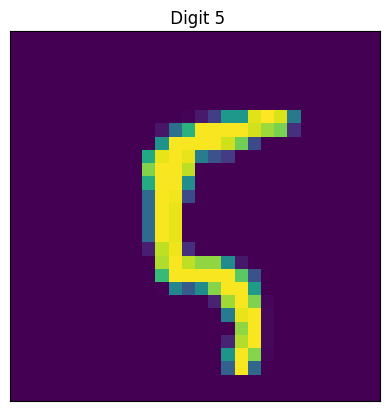

min and max value in image:  0 255


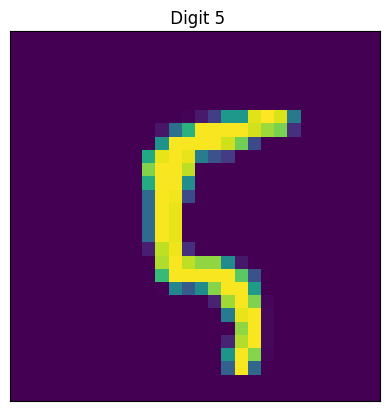

min and max value in image:  0.0 1.0


In [97]:
# Call the plot_image function to print out the 100th image in train_images.
plot_image(train_images, 100, train_labels)

# Call the show_min_max function to print the min and max values of the image.
show_min_max(train_images, 100)

# Change the image values to between 0 and 1, convert that training data into float32.
train_images = train_images.astype('float32')

# Change the image values to between 0 and 1, convert that test data into float32.
test_images = test_images.astype('float32')

# Divide the images by 255 to make sure that each pixel is stored as a value between 0 and 1.
train_images /= 255
test_images /= 255

# Call the plot_image function to print out the 100th image in train_images.
plot_image(train_images, 100, train_labels)

# Call the show_min_max function to print the min and max values of the image.
show_min_max(train_images, 100)

## One-Hot Encoding

In [98]:
# Employ one-hot encoding on your training labels.
train_labels = keras.utils.to_categorical(train_labels, num_classes)

# Employ one-hot encoding on your test labels.
test_labels = keras.utils.to_categorical(test_labels, num_classes)

# Building the Network
Neural networks learn to accomplish their tasks by reading training data and adjusting their neuron weights to improve their chance of choosing the correct answer.

## Import Model and Layers

In [99]:
# Import the Sequential model.
from tensorflow.keras.models import Sequential

# Import the Dense and Flatten layers.
from tensorflow.keras.layers import Dense, Flatten

## Epochs and Model Layers


In [100]:
# Create a variable called epochs and set the value as 10.
epochs = 10

# Create a new model object using the Keras Sequential.
model = Sequential()

# Add a Flatten layer and pass the input shape as an argument.
model.add(Flatten(input_shape=input_shape))

# Add a Dense layer to your network with the size of the layers in neurons and relu as the activation function.
model.add(Dense(16, activation='relu'))

# Add an output layer.
model.add(Dense(10, activation='softmax'))

# Print a summary of your network so far.
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 16)                12560     
                                                                 
 dense_9 (Dense)             (None, 10)                170       
                                                                 
Total params: 12730 (49.73 KB)
Trainable params: 12730 (49.73 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Training the Network
TensorFlow has a command that will do a lot of the work for you, but you still need to set up a few arguments so that this network is compiled in a useful way.

## Compile the Network

In [101]:
# Add the compile function that calculates the loss and uses the optimizer parameter to set the optimization algorithm.
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## Training

In [106]:
# Add the fit function and set the input data for the model so the network doesn't rely on a pattern to learn.
model.fit(train_images, train_labels, epochs=100, shuffle=True)

Epoch 1/100
1875/1875 [==============================] - 1s 768us/step - loss: 0.1202 - accuracy: 0.9641
Epoch 2/100
1875/1875 [==============================] - 1s 760us/step - loss: 0.1165 - accuracy: 0.9654
Epoch 3/100
1875/1875 [==============================] - 1s 765us/step - loss: 0.1128 - accuracy: 0.9663
Epoch 4/100
1875/1875 [==============================] - 1s 770us/step - loss: 0.1097 - accuracy: 0.9673
Epoch 5/100
1875/1875 [==============================] - 1s 777us/step - loss: 0.1065 - accuracy: 0.9685
Epoch 6/100
1875/1875 [==============================] - 1s 776us/step - loss: 0.1035 - accuracy: 0.9688
Epoch 7/100
1875/1875 [==============================] - 1s 770us/step - loss: 0.1020 - accuracy: 0.9685
Epoch 8/100
1875/1875 [==============================] - 1s 764us/step - loss: 0.0994 - accuracy: 0.9701
Epoch 9/100
1875/1875 [==============================] - 1s 763us/step - loss: 0.0975 - accuracy: 0.9708
Epoch 10/100
1875/1875 [==============================]

## Analyzing the Output

In [107]:
# Calculate the loss and accuracy of your model.
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

# Print out the test accuracy.
print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.2312 - accuracy: 0.9553 - 213ms/epoch - 679us/step

Test accuracy: 0.955299973487854


## Exporting the Model

In [108]:
# Export your model
model.save("digit_classification.h5")